In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Hitters.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
data.shape

(322, 20)

In [ ]:
data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [11]:
# preprocessing technique

salary_inputer = SimpleImputer(strategy='mean')

# use double brackets for data[['Salary']]
# otherwise, it will give error
data['Salary'] = salary_inputer.fit_transform(data[['Salary']])

In [12]:
data.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [13]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


In [14]:
xx = data[['CRuns']]

In [17]:
# Standard scaler is used to remove the outliers

sc = StandardScaler()

x = sc.fit_transform(xx)

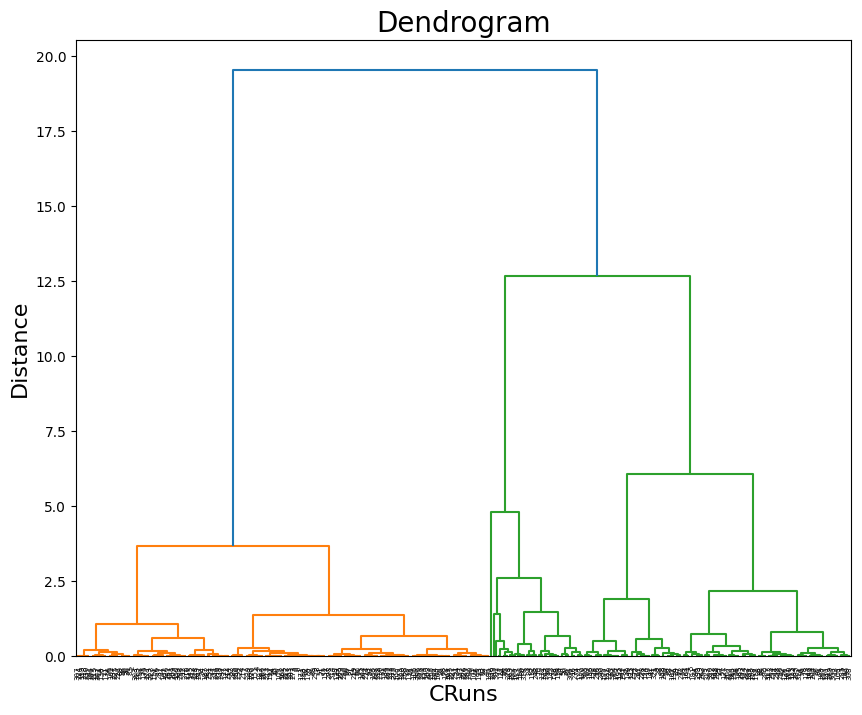

In [18]:
# visualizing the Dendrogram

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 8))
plt.title("Dendrogram", fontsize=20)
plt.xlabel("CRuns", fontsize=16)
plt.ylabel("Distance", fontsize=16)

dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [19]:
# here, by visualization, we can conclude that the clusters are 3

In [20]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [21]:
pred = cluster.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [22]:
pred

array([1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0,

In [23]:
data['cluster'] = pred

In [24]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,cluster
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,535.925882,A,1
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.000000,N,0
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.000000,A,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.000000,N,2
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.500000,N,1


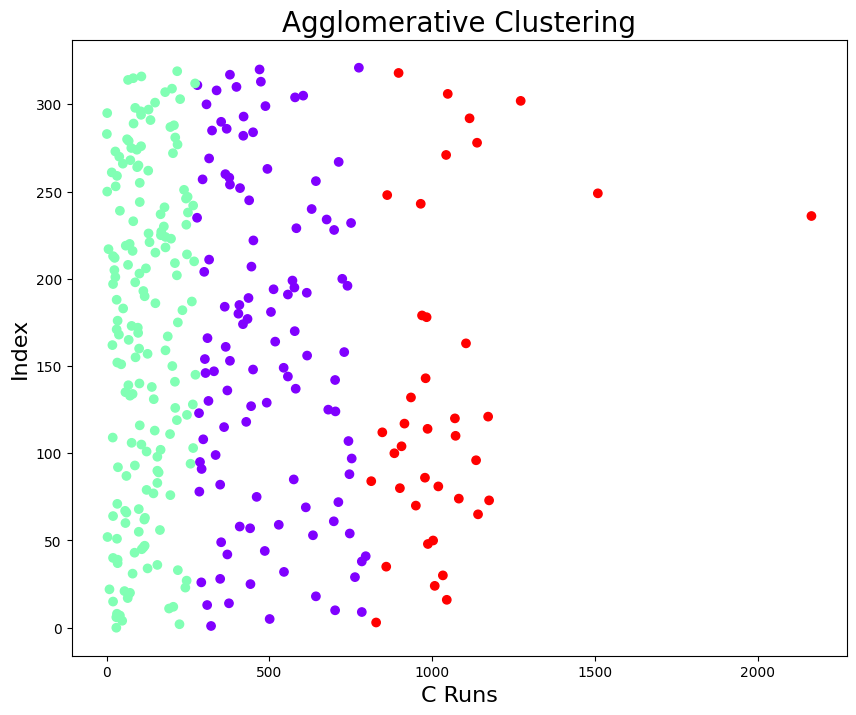

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(xx, xx.index, c = data['cluster'], cmap='rainbow')
plt.title('Agglomerative Clustering', fontsize=20)
plt.xlabel('C Runs', fontsize=16)
plt.ylabel('Index', fontsize=16)
plt.show()